In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pancancer_utilities.config as cfg

In [2]:
pancancer_dir = os.path.join(cfg.results_dir, 'pancancer')
single_cancer_dir = os.path.join(cfg.results_dir, 'single_cancer')

In [3]:
results_df = pd.DataFrame()

for gene_name in os.listdir(single_cancer_dir):
    gene_dir = os.path.join(single_cancer_dir, gene_name)
    for results_file in os.listdir(gene_dir):
        if 'classify' not in results_file: continue
        full_results_file = os.path.join(gene_dir, results_file)
        gene_results_df = pd.read_csv(full_results_file, sep='\t')
        gene_results_df['train_set'] = 'single_cancer'
        gene_results_df['identifier'] = (
            gene_results_df['gene'] + '_' +
            gene_results_df['holdout_cancer_type']
        )
        results_df = pd.concat((results_df, gene_results_df))

results_df.head(n=10)

,auroc,aupr,gene,holdout_cancer_type,signal,seed,data_type,fold,train_set,identifier
0,0.99792,0.99774,TP53,SARC,shuffled,42,train,0,single_cancer,TP53_SARC
1,0.62840,0.61761,TP53,SARC,shuffled,42,test,0,single_cancer,TP53_SARC
2,0.55020,0.58491,TP53,SARC,shuffled,42,cv,0,single_cancer,TP53_SARC
3,1.00000,1.00000,TP53,SARC,shuffled,42,train,1,single_cancer,TP53_SARC
4,0.54074,0.59550,TP53,SARC,shuffled,42,test,1,single_cancer,TP53_SARC
5,0.56830,0.52931,TP53,SARC,shuffled,42,cv,1,single_cancer,TP53_SARC
6,0.94886,0.95521,TP53,SARC,shuffled,42,train,2,single_cancer,TP53_SARC
7,0.64107,0.61347,TP53,SARC,shuffled,42,test,2,single_cancer,TP53_SARC
8,0.50387,0.55023,TP53,SARC,shuffled,42,cv,2,single_cancer,TP53_SARC
9,0.82198,0.82864,TP53,SARC,shuffled,42,train,3,single_cancer,TP53_SARC


In [4]:
pancancer_df = pd.DataFrame()

for gene_name in os.listdir(pancancer_dir):
    gene_dir = os.path.join(pancancer_dir, gene_name)
    for results_file in os.listdir(gene_dir):
        if 'classify' not in results_file: continue
        full_results_file = os.path.join(gene_dir, results_file)
        gene_results_df = pd.read_csv(full_results_file, sep='\t')
        gene_results_df['train_set'] = 'pancancer'
        gene_results_df['identifier'] = (
            gene_results_df['gene'] + '_' +
            gene_results_df['holdout_cancer_type']
        )
        pancancer_df = pd.concat((pancancer_df, gene_results_df))

pancancer_df.head(n=10)

,auroc,aupr,gene,holdout_cancer_type,signal,seed,data_type,fold,train_set,identifier
0,0.50000,0.47645,TP53,SARC,shuffled,42,train,0,pancancer,TP53_SARC
1,0.50000,0.47368,TP53,SARC,shuffled,42,test,0,pancancer,TP53_SARC
2,0.50229,0.47905,TP53,SARC,shuffled,42,cv,0,pancancer,TP53_SARC
3,0.50000,0.47561,TP53,SARC,shuffled,42,train,1,pancancer,TP53_SARC
4,0.50000,0.56452,TP53,SARC,shuffled,42,test,1,pancancer,TP53_SARC
5,0.50290,0.47844,TP53,SARC,shuffled,42,cv,1,pancancer,TP53_SARC
6,0.50000,0.47677,TP53,SARC,shuffled,42,train,2,pancancer,TP53_SARC
7,0.50000,0.43137,TP53,SARC,shuffled,42,test,2,pancancer,TP53_SARC
8,0.49990,0.47673,TP53,SARC,shuffled,42,cv,2,pancancer,TP53_SARC
9,0.50000,0.47660,TP53,SARC,shuffled,42,train,3,pancancer,TP53_SARC


Text(0.5, 1.0, 'ROC in single cancer case')

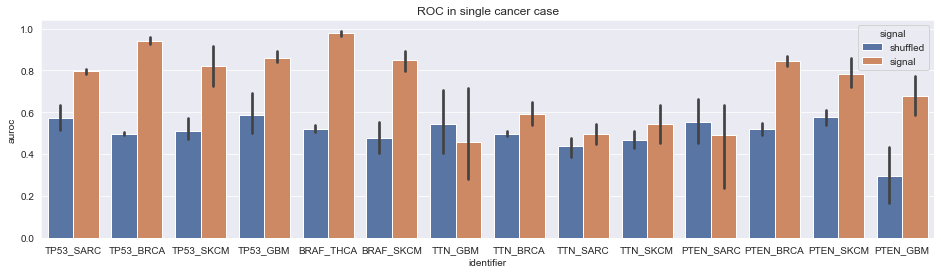

In [12]:
sns.set({'figure.figsize': (16, 4)})
plot_df = results_df[
    results_df['data_type'] == 'test'
]
sns.barplot(data=plot_df, x='identifier', y='auroc', hue='signal')
plt.title('ROC in single cancer case')

Text(0.5, 1.0, 'ROC in pan-cancer case')

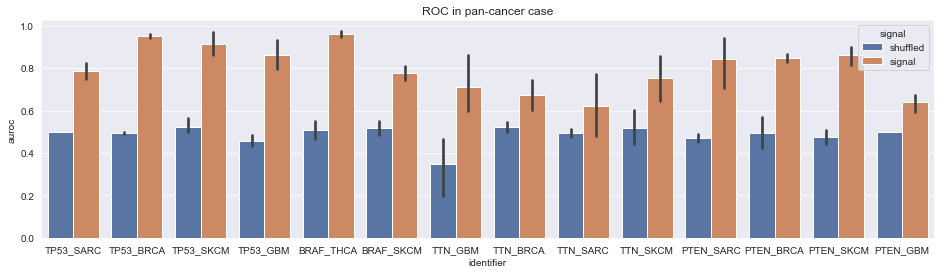

In [13]:
sns.set({'figure.figsize': (16, 4)})
plot_df = pancancer_df[
    pancancer_df['data_type'] == 'test'
]
sns.barplot(data=plot_df, x='identifier', y='auroc', hue='signal')
plt.title('ROC in pan-cancer case')